In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 30})
%matplotlib inline

pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 100)

pd.options.display.float_format = '{:,.0f}'.format

## Budget Ranges vs. profit

In [2]:
counts_pos = []

In [3]:
counts_neg = []

In [4]:
df = pd.read_csv('data/boxoffice_profit.csv')

In [5]:
df.head()

,Unnamed: 0,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,PnL,profit
0,0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2015837654,2351345279,True
1,1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,804600000,635063875,True
2,2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,107000000,-200237650,False
3,3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,944008095,1072413963,True
4,4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,696540365,999721747,True


### Profitable Counts

In [6]:
counts_pos.append(len(df[(df['profit'] == True) &  (df['production_budget'] < 10000000)].index))

In [7]:
counts_pos.append(len(df[(df['profit'] == True) &  (df['production_budget'] >= 10000000) & (df['production_budget'] <= 20000000)].index))

In [8]:
counts_pos.append(len(df[(df['profit'] == True) &  (df['production_budget'] >= 20000000) & (df['production_budget'] <= 50000000)].index))

In [9]:
counts_pos.append(len(df[(df['profit'] == True) &  (df['production_budget'] >= 50000000) & (df['production_budget'] <= 100000000)].index))

In [10]:
counts_pos.append(len(df[(df['profit'] == True) &  (df['production_budget'] >= 100000000) & (df['production_budget'] <= 200000000)].index))

In [11]:
counts_pos.append(len(df[(df['profit'] == True) &  (df['production_budget'] >= 20000000)].index))

In [12]:
counts_pos

[1059, 777, 1086, 626, 330, 1968]

### Not Profitable Counts

In [13]:
counts_neg.append(len(df[(df['profit'] == False) &  (df['production_budget'] < 10000000)].index))

In [14]:
counts_neg.append(len(df[(df['profit'] == False) &  (df['production_budget'] >= 10000000) & (df['production_budget'] <= 20000000)].index))

In [15]:
counts_neg.append(len(df[(df['profit'] == False) &  (df['production_budget'] >= 20000000) & (df['production_budget'] <= 50000000)].index))

In [16]:
counts_neg.append(len(df[(df['profit'] == False) &  (df['production_budget'] >= 50000000) & (df['production_budget'] <= 100000000)].index))

In [17]:
counts_neg.append(len(df[(df['profit'] == False) &  (df['production_budget'] >= 100000000) & (df['production_budget'] <= 200000000)].index))

In [18]:
counts_neg.append(len(df[(df['profit'] == False) &  (df['production_budget'] >= 20000000)].index))

In [19]:
counts_neg = np.asarray(counts_neg)

In [37]:
labels = ['<10','<20','<50','<100','<200','>200']

In [51]:
font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 18}

plt.rc('font', **font)

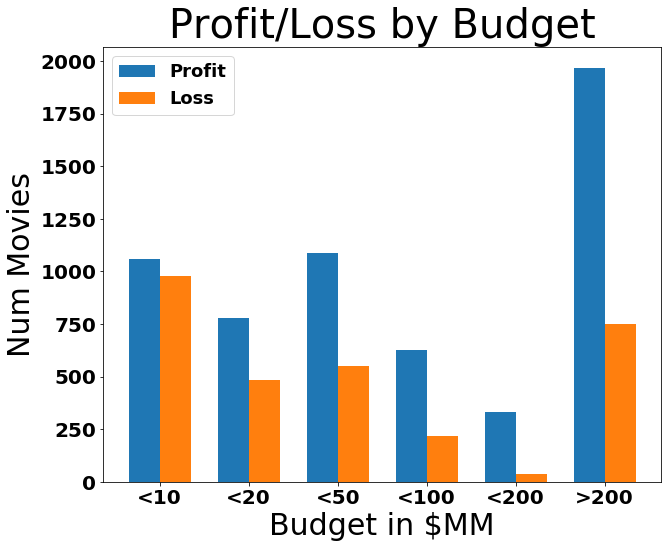

In [69]:
N = 6
plt.figure(figsize=(10,8))
ind = np.arange(N) 
width = 0.35     

plt.bar(ind, counts_pos, width, label='Profit')
plt.bar(ind + width, counts_neg, width, label='Loss')
plt.ylabel('Num Movies', fontsize=30)
plt.title('Profit/Loss by Budget', fontsize=40)
plt.xlabel('Budget in $MM', fontsize=30)
plt.xticks(ind + width / 2, (labels))
plt.legend(loc='best')

plt.show();